In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import datetime

In [2]:
df = pd.read_csv('../data/consolidated_data/training_dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df["date"] = pd.to_datetime(df["date"])
df = df.groupby('date').sum()

In [3]:
split_index = int(0.8 * len(df))
df.drop(columns=['cases_new'],inplace=True)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

pd.set_option('display.max_columns', None)

print("Training data shape:", train_data.shape)

print("Testing data shape:", test_data.shape, test_data)

Training data shape: (1238, 25)
Testing data shape: (310, 25)             cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                 
2023-06-16              651         17971           58           2   
2023-06-17              630         17741           42           2   
2023-06-18              462         17645           39           2   
2023-06-19              542         17385           38           1   
2023-06-20              655         17143           55           2   
...                     ...           ...          ...         ...   
2024-04-16               44          7736           21           1   
2024-04-17               40          7821           20           0   
2024-04-18               31          7924           12           0   
2024-04-19               21          8038           20           1   
2024-04-20               27          8129           17           1   

            cases_fvax  cas

In [4]:
training_data_x = train_data.drop(columns=["cases_active"])
training_data_y = train_data["cases_active"]

test_data_x = test_data.drop(columns=["cases_active"])
test_data_y = test_data["cases_active"]

print("Training data shape:", training_data_x.shape, training_data_y.shape)

Training data shape: (1238, 24) (1238,)


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

model = LinearRegression()

model.fit(training_data_x, training_data_y)

pred_linearregression = model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y, pred_linearregression)
mae = mean_absolute_error(test_data_y, pred_linearregression)
r2 = r2_score(test_data_y, pred_linearregression)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_linearregression[:5], "actual values: ", test_data_y[:5].values)

Mean Squared Error:  62842196.37266856
Mean Absolute Error:  7279.827424439735
R Square Score:  -0.9367799009469482
predicted values:  [8317.60571555 8323.54901077 6846.4447166  6236.73789128 7904.88153329] actual values:  [17971 17741 17645 17385 17143]


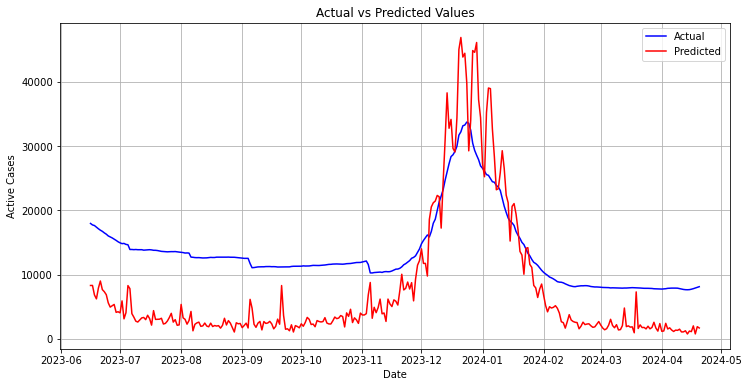

In [6]:
import matplotlib.pyplot as plt

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_active": test_data_y.values})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_linearregression})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_active"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=200, random_state=50)
forest_model.fit(training_data_x, training_data_y)

pred_randomforest = forest_model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y, pred_randomforest)
mae = mean_absolute_error(test_data_y, pred_randomforest)
r2 = r2_score(test_data_y, pred_randomforest)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_randomforest[:5], "actual values: ", test_data_y[:5].values)

Mean Squared Error:  43268237.61068612
Mean Absolute Error:  5861.463774193549
R Square Score:  -0.3335156597139657
predicted values:  [13314.885 12456.47  13572.74   8574.745 14096.495] actual values:  [17971 17741 17645 17385 17143]


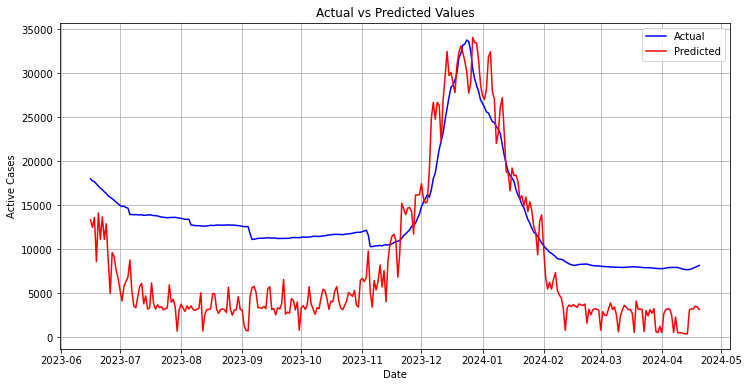

In [8]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_active": test_data_y.values})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_randomforest})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_active"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()